# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
import pandas as pd 
import matplotlib as plt
%matplotlib inline
import numpy as np
import sklearn
import psycopg2 as psy
import seaborn as sns

#### Step 2: Examine your data 

In [2]:
airports = pd.read_csv('../assets/airports.csv')
ops = pd.read_csv('../assets/Airport_operations.csv')
cancels = pd.read_csv('../assets/airport_cancellations.csv')

In [3]:
airports.head(5)

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [4]:
ops.head(2)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.60,9.79,2.29,11.2,2.26,0.89,2.34,10.24


In [5]:
cancels.head(2)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [6]:
print(cancels.shape)
print(ops.shape)
print(airports.shape)

(805, 6)
(841, 15)
(5167, 13)


### Intro: Write a problem statement / aim for this project

### Part 1: Create a PostgreSQL database 

#### 1. Let's create a database where we can house our airport data

In [7]:
from sqlalchemy import create_engine

engine = create_engine("postgresql://@localhost:5432/airport")

In [8]:
%load_ext sql

/Users/TuckerCS/anaconda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/TuckerCS/anaconda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [9]:
%%sql 
postgresql://@localhost:5432/airport

u'Connected: @airport'

Load our csv files into tables

In [11]:
airports.to_sql('airports', engine)
ops.to_sql('ops', engine)
cancels.to_sql('cancels',  engine)

In [15]:
%%sql 

SELECT * 
FROM airports 
LIMIT 2;

2 rows affected.


index,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,None,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.01933,No


In [19]:
%%sql 

SELECT *
FROM cancels
LIMIT 2;

2 rows affected.


index,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0


In [18]:
%%sql

SELECT *
FROM ops
LIMIT 2;

2 rows affected.


index,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.803,0.7809,0.7921,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.814,0.7922,0.8001,9.6,9.79,2.29,11.2,2.26,0.89,2.34,10.24


Join airport_cancellations.csv and airports.csv into one table

In [43]:
%%sql

SELECT *
FROM airports a, cancels c
WHERE c."Airport" = a."LocID"
LIMIT 5; 

5 rows affected.


index,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available,index_1,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
10,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,727,SJU,2014.0,280.0,241.0,72.0,31.0
10,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,726,SJU,2013.0,127.0,94.0,65.0,64.0
10,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,725,SJU,2012.0,174.0,141.0,62.0,41.0
10,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,724,SJU,2011.0,240.0,201.0,101.0,55.0
10,2885.0,SJU,LUIS MUNOZ MARIN INTL,Aeropuerto Int'l Luis Mu�oz Marin,Airport,ASO,#NAME?,SAN JUAN,PR,Federalized/Commercial,18.439295,-66.002004,Yes,723,SJU,2010.0,258.0,207.0,82.0,45.0


In [44]:
%%sql
CREATE TABLE airport_data 
AS(
SELECT *
FROM airports a, cancels c
WHERE c."Airport" = a."LocID"); 

(psycopg2.ProgrammingError) column "index" specified more than once
 [SQL: 'CREATE TABLE airport_data \nAS(\nSELECT *\nFROM airports a, cancels c\nWHERE c."Airport" = a."LocID");']


Query the database for our intial data

In [ ]:
# df = pd.read_sql()

#### 1.2 What are the risks and assumptions of our data? 

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [100]:
df = pd.merge(ops, cancels, left_on=['airport', 'year'], right_on=['Airport','Year'], how='outer')

In [101]:
sum(df.airport.value_counts())

841

In [102]:
df.shape

(847, 21)

In [103]:
sum(df.Airport.isnull())

42

In [104]:
df = df[df['airport'].isnull() != True]

In [105]:
df = df[df['Airport'].isnull() !=True]

In [106]:
df = pd.merge(df, airports, left_on='airport', right_on='LocID', how='left')

In [107]:
df.shape

(799, 34)

In [115]:
del df['Airport']
del df['Year']
del df['Key']
del df['LocID']
del df['AP_NAME']
del df['ALIAS']
del df['Facility Type']
del df['Boundary Data Available']

In [119]:
df.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay',
       u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions', u'FAA REGION',
       u'COUNTY', u'CITY', u'STATE', u'AP Type', u'Latitude', u'Longitude'],
      dtype='object')

In [120]:
df.columns = [u'airport', u'year', u'num_departures',
       u'num_arrivals', u'pct on-time gate departures',
       u'pct on-time apt departures', u'pct on-time gate arrivals',
       u'avg gate departure delay', u'avg taxi out time',
       u'avg taxi out delay', u'avg apt departure delay',
       u'avg airborne delay', u'avg taxi in delay',
       u'avg block delay', u'avg gate arrival delay',
       u'departure cancellations', u'arrival cancellations',
       u'departure diversions', u'arrival diversions', u'FAA region',
       u'county', u'city', u'state', u'AP type', u'latitude', u'longitude']

In [123]:
df.head()

,airport,year,num_departures,num_arrivals,pct on-time gate departures,pct on-time apt departures,pct on-time gate arrivals,avg gate departure delay,avg taxi out time,avg taxi out delay,...,arrival cancellations,departure diversions,arrival diversions,FAA region,county,city,state,AP type,latitude,longitude
0,ABQ,2004.0,53971.0,53818.0,0.8030,0.7809,0.7921,10.38,9.89,2.43,...,235.0,71.0,46.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194
1,ABQ,2005.0,51829.0,51877.0,0.8140,0.7922,0.8001,9.60,9.79,2.29,...,190.0,61.0,33.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194
2,ABQ,2006.0,49682.0,51199.0,0.7983,0.7756,0.7746,10.84,9.89,2.16,...,329.0,71.0,124.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194
3,ABQ,2007.0,53255.0,53611.0,0.8005,0.7704,0.7647,11.29,10.34,2.40,...,304.0,107.0,45.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194
4,ABQ,2008.0,49589.0,49512.0,0.8103,0.7844,0.7875,10.79,10.41,2.41,...,300.0,79.0,42.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194


In [140]:
a_df = df[[u'airport', u'num_arrivals', u'pct on-time gate arrivals',
          u'avg airborne delay', u'avg taxi in delay',
          u'avg block delay', u'avg gate arrival delay', u'arrival cancellations', u'arrival diversions']]

In [143]:
d_df = df[[u'airport', u'num_departures', u'pct on-time gate departures',
         u'pct on-time apt departures',u'avg gate departure delay', u'avg taxi out time',
         u'avg taxi out delay', u'avg apt departure delay',
         u'departure cancellations',u'departure diversions']]

#### Are there any unique values? 

### Part 3: Data Mining

#### 3.1 Create Dummy Variables

#### 3.2 Format and Clean the Data

### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

#### 4.2 Find correlations in the data

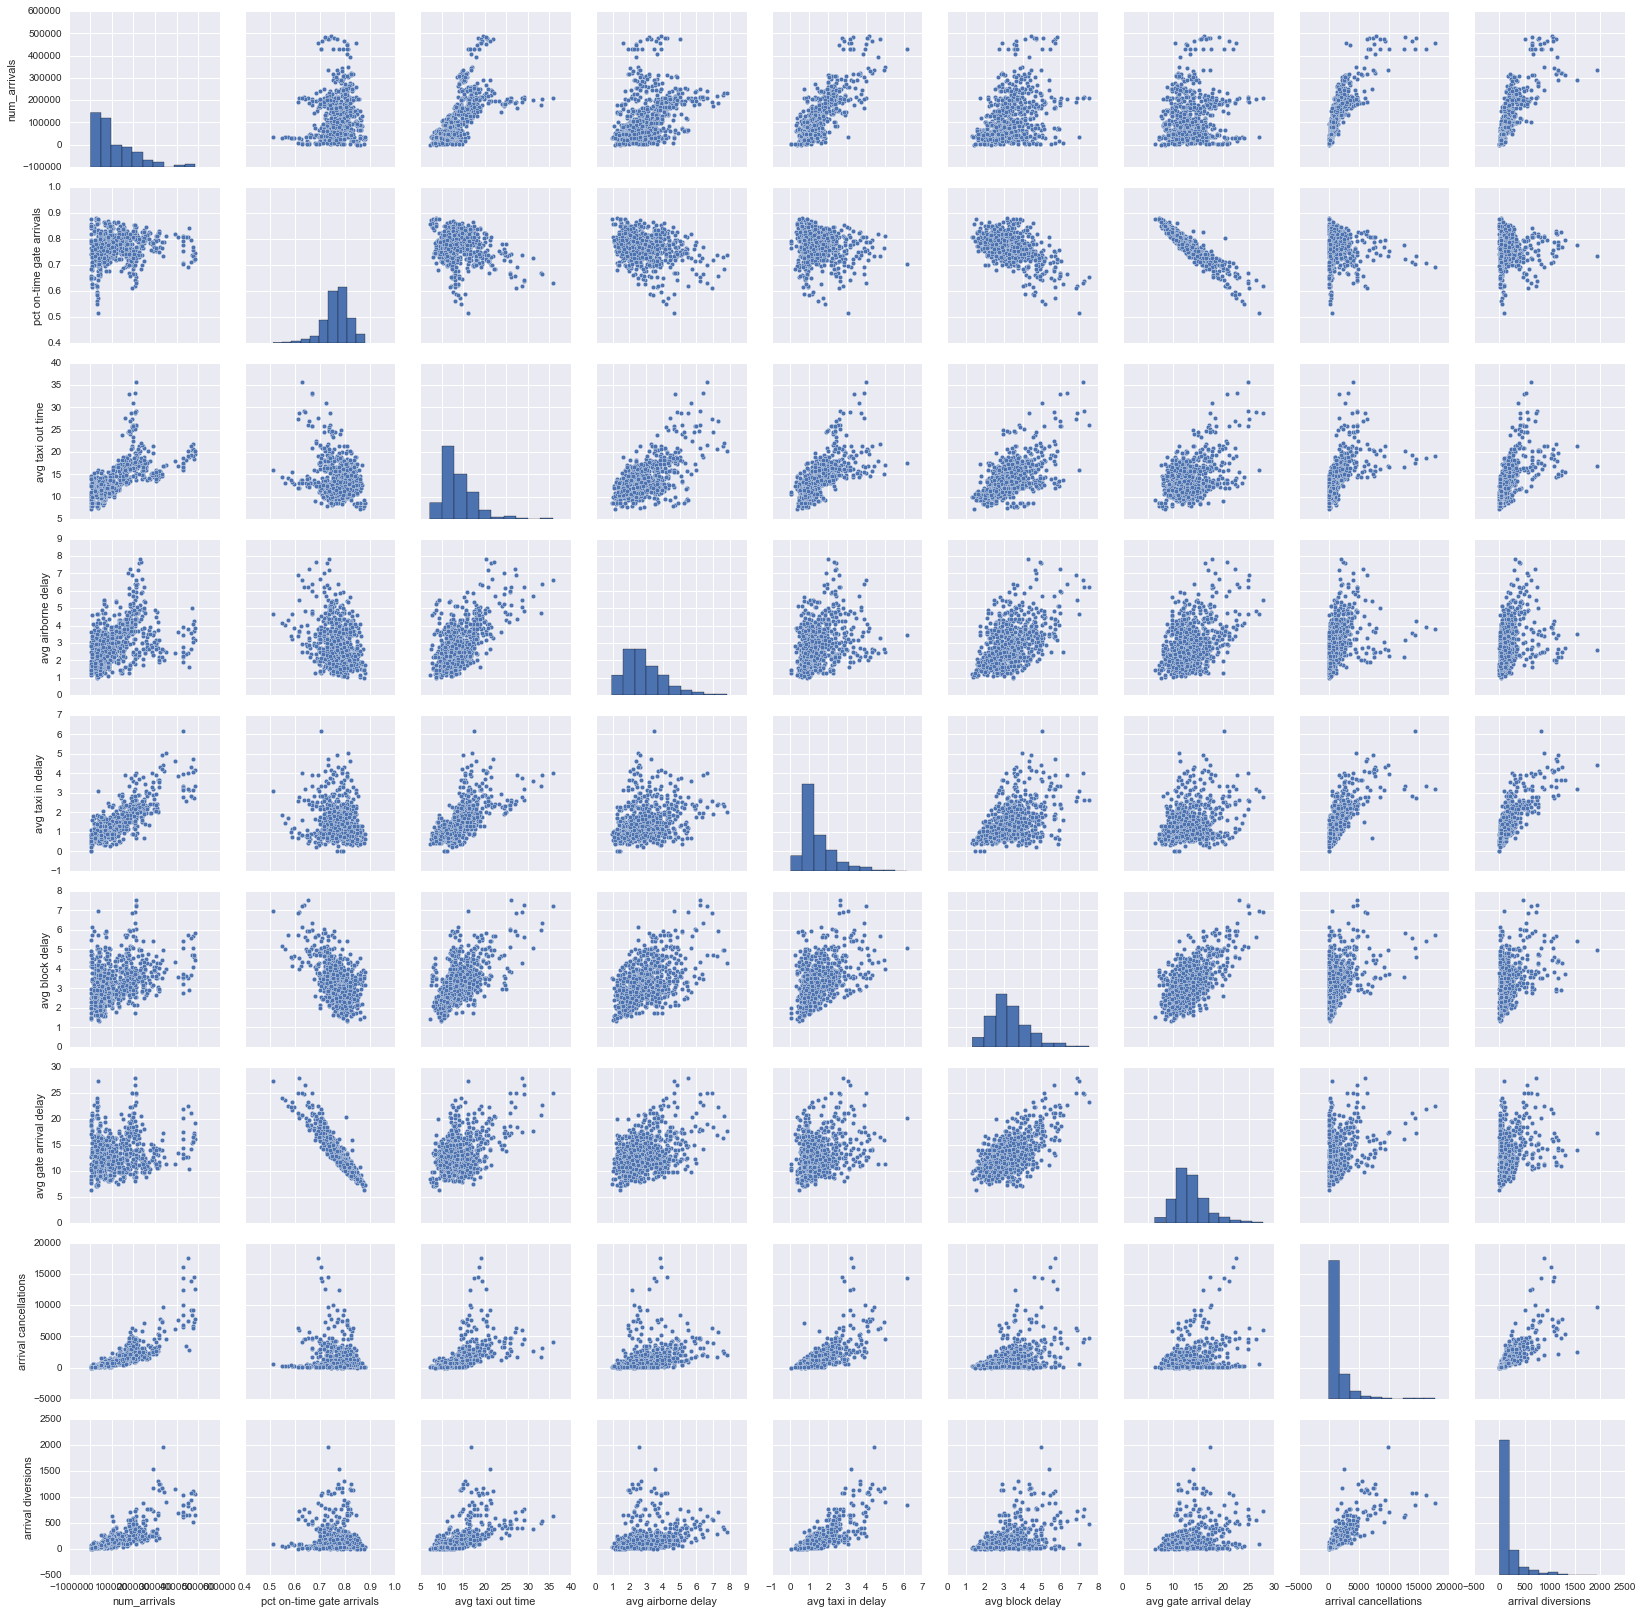

In [129]:
sns.pairplot(a_df)

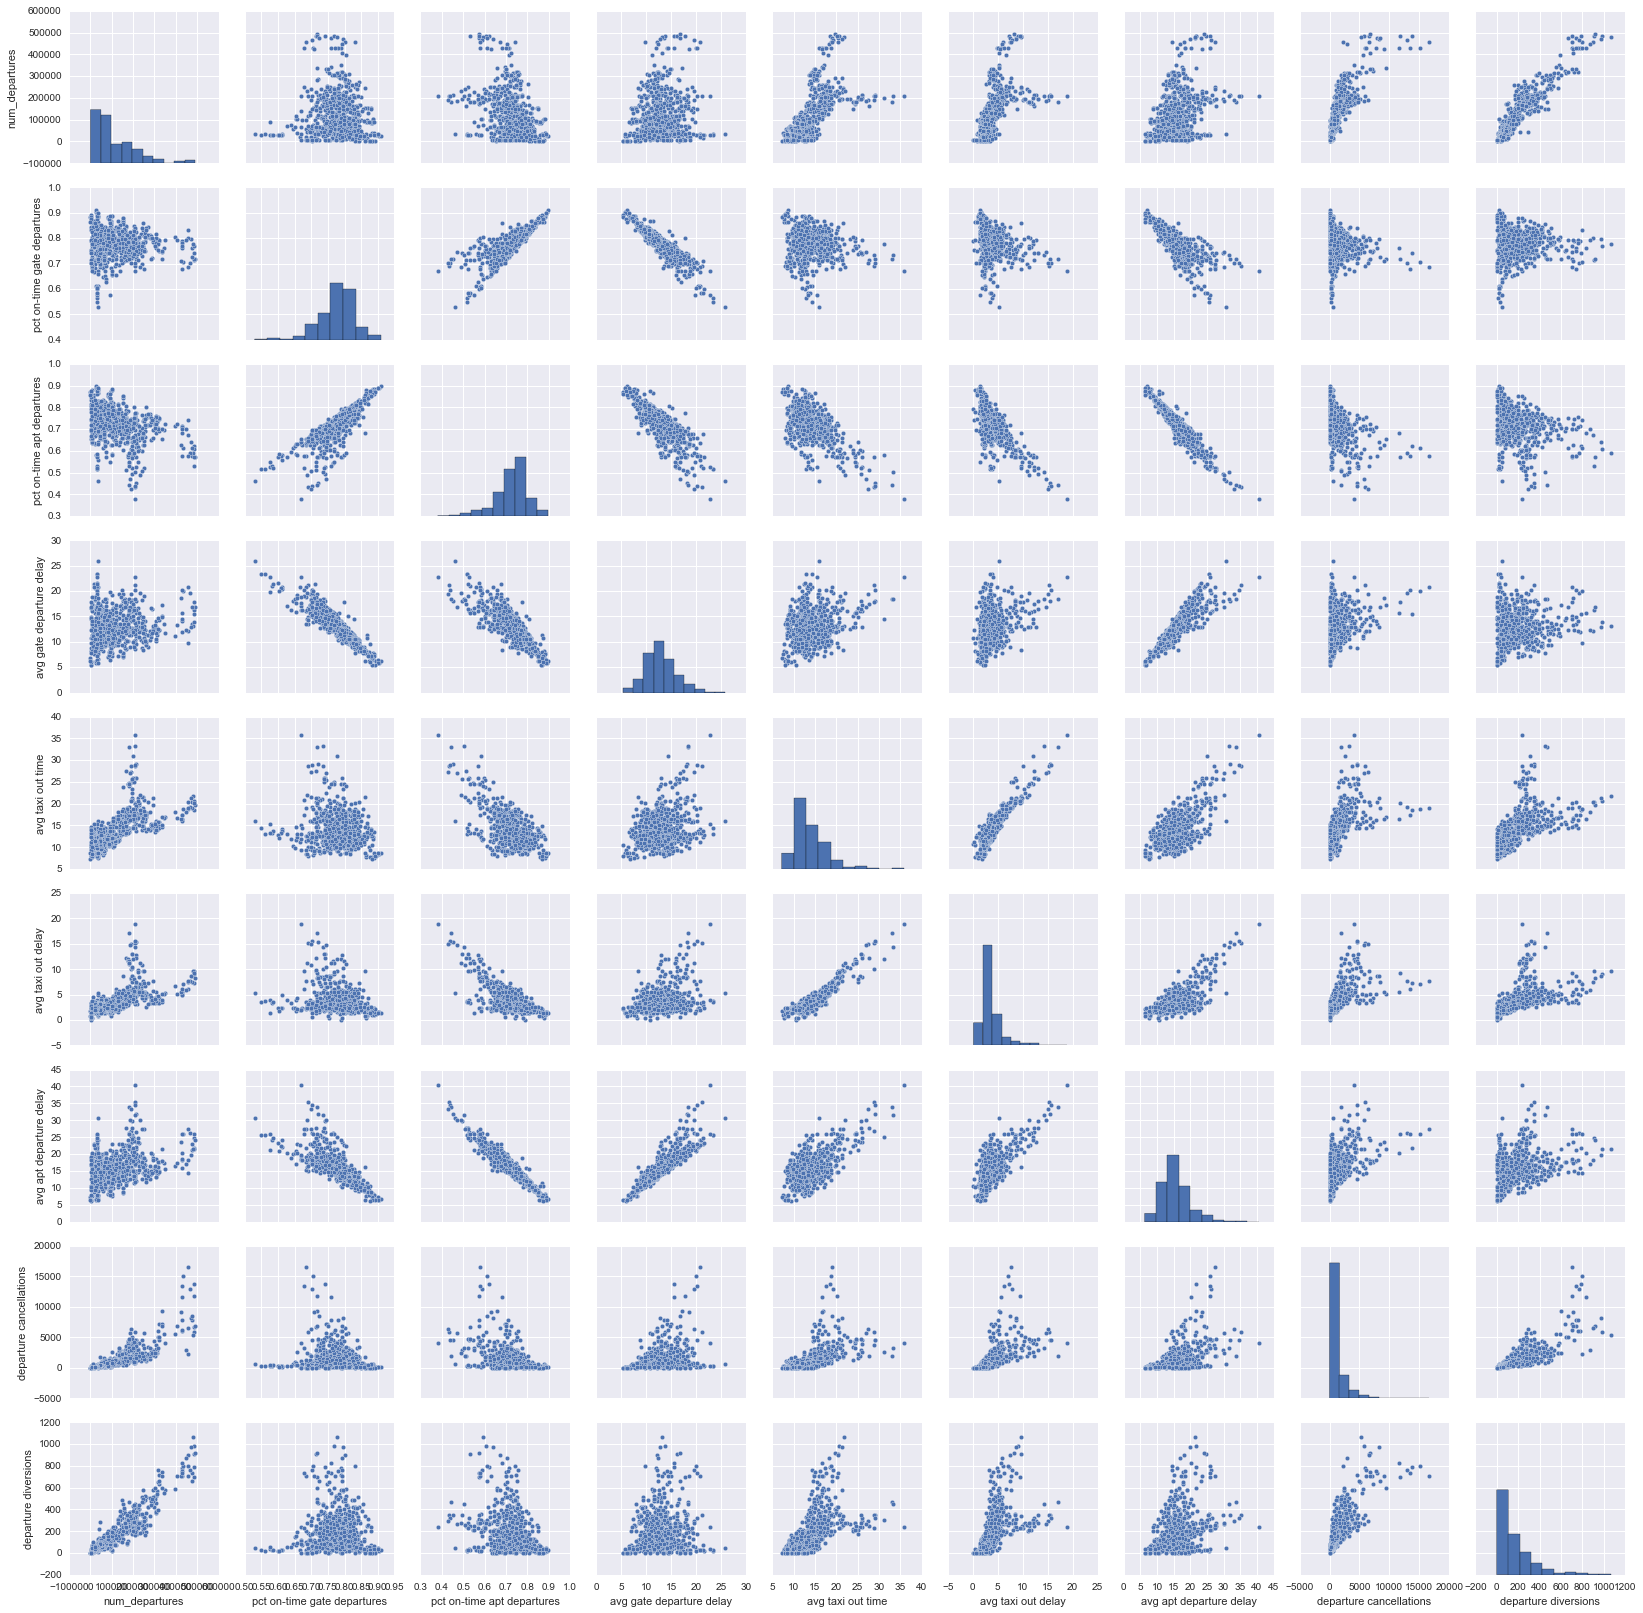

In [144]:
sns.pairplot(d_df)

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

#### 4.4 Validate your findings using statistical analysis

#### 4.5 How can you improve your overall analysis? 

Answer: 

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

### Part 6: Additional Analysis
Include any other models you'd like to run here. These can include regressions, classifications, or clusters. 

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

Which operational features are most correlated with delays?

What should the airport's next steps be?

### Bonus: Copy your Database to AWS 

Make sure to properly document all of the features of your dataset

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied